In [33]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [34]:
!ls /content/drive/MyDrive/Data_Science/

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
 bihar_administrative.dbf   Data_science_NK.pptx	     Matplotlib_Data_science.pptx
 bihar_administrative.prj  'Desktop\export_dataframe.xlsx'   Matplotlib_DS_1.ipynb
 bihar_administrative.shx   DS_1.ipynb			     NDVI.csv
 boxplot.pptx		    DS_2.ipynb			    'NO2 (1).csv'
 cpr_plot_1.csv		    DS_3.ipynb			     NO2.csv
'cpr_plot (1).csv'	    DS_4.1.ipynb		     Shape_folder
'cpr_plot (2).csv'	    DS_4.2.ipynb		     SSM.csv
 cpr_plot.csv		    LST.csv


In [35]:
import os
os.chdir('/content/drive/MyDrive/Data_Science/')
!pwd

/content/drive/MyDrive/Data_Science


# Read csv file as Dataframe using Pandas

In [36]:
import pandas as pd
df = pd.read_csv("NO2.csv")
print(df)

          Date       NO2  Year     City
0    25-Apr-20  0.000074  2020  Bergamo
1     5-Apr-20  0.000074  2020  Bergamo
2    25-Apr-20  0.000075  2020  Bergamo
3    11-Apr-20  0.000076  2020  Bergamo
4     4-Apr-20  0.000077  2020  Bergamo
..         ...       ...   ...      ...
364  19-Feb-19  0.000629  2019    Wuhan
365  21-Feb-19  0.000630  2019    Wuhan
366   5-Mar-19  0.000711  2019    Wuhan
367  24-Feb-19  0.000766  2019    Wuhan
368  19-Feb-19  0.000786  2019    Wuhan

[369 rows x 4 columns]


## Summary tables

In [37]:
print(pd.crosstab(df['Year'], df['City']))

pd.crosstab(df['City'], df['Year'])       # Write with print

City  Bergamo  Madrid  New Delhi  New York  Qom  Wuhan
Year                                                  
2019       40      34         44        13   23     35
2020       39      39         47        12   19     24


Year,2019,2020
City,,
Bergamo,40,39
Madrid,34,39
New Delhi,44,47
New York,13,12
Qom,23,19
Wuhan,35,24


In [38]:
print(pd.crosstab(df['Year'], df['City'], normalize=True))
pd.crosstab(df['City'], df['Year'], normalize=True)

City   Bergamo    Madrid  New Delhi  New York       Qom     Wuhan
Year                                                             
2019  0.108401  0.092141   0.119241   0.03523  0.062331  0.094851
2020  0.105691  0.105691   0.127371   0.03252  0.051491  0.065041


Year,2019,2020
City,,
Bergamo,0.108401,0.105691
Madrid,0.092141,0.105691
New Delhi,0.119241,0.127371
New York,0.035230,0.032520
Qom,0.062331,0.051491
Wuhan,0.094851,0.065041


# Basic of pandas
## sort dataframe by column pandas


*Sort by col 2*

In [39]:
df.sort_values(by=['NO2'], ascending=True)            # ascending order

,Date,NO2,Year,City
79,27-Apr-20,0.000063,2020,Madrid
118,25-Apr-19,0.000066,2019,Madrid
268,11-Apr-20,0.000066,2020,Qom
80,26-Apr-20,0.000068,2020,Madrid
81,26-Apr-20,0.000068,2020,Madrid
...,...,...,...,...
364,19-Feb-19,0.000629,2019,Wuhan
365,21-Feb-19,0.000630,2019,Wuhan
366,5-Mar-19,0.000711,2019,Wuhan
367,24-Feb-19,0.000766,2019,Wuhan


*Descending*

In [40]:
df.sort_values(by='NO2', ascending=False)

,Date,NO2,Year,City
368,19-Feb-19,0.000786,2019,Wuhan
367,24-Feb-19,0.000766,2019,Wuhan
366,5-Mar-19,0.000711,2019,Wuhan
365,21-Feb-19,0.000630,2019,Wuhan
364,19-Feb-19,0.000629,2019,Wuhan
...,...,...,...,...
81,26-Apr-20,0.000068,2020,Madrid
80,26-Apr-20,0.000068,2020,Madrid
268,11-Apr-20,0.000066,2020,Qom
118,25-Apr-19,0.000066,2019,Madrid


_Sort by multiple columns_

In [54]:
df.sort_values(by=['NO2', 'Date'])

,Date,NO2,Year,City
79,27-Apr-20,0.000063,2020,Madrid
118,25-Apr-19,0.000066,2019,Madrid
268,11-Apr-20,0.000066,2020,Qom
80,26-Apr-20,0.000068,2020,Madrid
81,26-Apr-20,0.000068,2020,Madrid
...,...,...,...,...
364,19-Feb-19,0.000629,2019,Wuhan
365,21-Feb-19,0.000630,2019,Wuhan
366,5-Mar-19,0.000711,2019,Wuhan
367,24-Feb-19,0.000766,2019,Wuhan


 Unique values

In [55]:
print(df.groupby('City')['Year'].nunique())

print()
print(df.groupby('City')['NO2'].nunique())

print()
print(df.groupby('Year')['NO2'].nunique())


City
Bergamo      2
Madrid       2
New Delhi    2
New York     2
Qom          2
Wuhan        2
Name: Year, dtype: int64

City
Bergamo      59
Madrid       66
New Delhi    74
New York     25
Qom          38
Wuhan        55
Name: NO2, dtype: int64

Year
2019    137
2020    124
Name: NO2, dtype: int64


### Select Rows from Pandas DataFrame

In [56]:
print("City = Bergamo")
print(df.loc[df['City'] == 'Bergamo'])   #loc
print("\nCity = New Delhi")
print(df.loc[df['City'] == 'New Delhi'])

City = Bergamo
         Date       NO2  Year     City
0   25-Apr-20  0.000074  2020  Bergamo
1    5-Apr-20  0.000074  2020  Bergamo
2   25-Apr-20  0.000075  2020  Bergamo
3   11-Apr-20  0.000076  2020  Bergamo
4    4-Apr-20  0.000077  2020  Bergamo
..        ...       ...   ...      ...
74   8-Apr-19  0.000243  2019  Bergamo
75  11-Apr-19  0.000243  2019  Bergamo
76   2-Apr-19  0.000250  2019  Bergamo
77  30-Mar-19  0.000276  2019  Bergamo
78   5-Apr-19  0.000296  2019  Bergamo

[79 rows x 4 columns]

City = New Delhi
          Date       NO2  Year       City
152  23-Apr-20  0.000074  2020  New Delhi
153  10-Apr-20  0.000083  2020  New Delhi
154  20-Apr-20  0.000083  2020  New Delhi
155  18-Apr-20  0.000087  2020  New Delhi
156  12-Apr-20  0.000091  2020  New Delhi
..         ...       ...   ...        ...
238  22-Apr-19  0.000250  2019  New Delhi
239  23-Apr-19  0.000254  2019  New Delhi
240  14-May-19  0.000266  2019  New Delhi
241  18-Apr-19  0.000315  2019  New Delhi
242   3-May-19

### Select rows where the label of NO2 is equal or greater than value

In [44]:
df.loc[df['NO2'] <= 0.000077]

,Date,NO2,Year,City
0,25-Apr-20,0.000074,2020,Bergamo
1,5-Apr-20,0.000074,2020,Bergamo
2,25-Apr-20,0.000075,2020,Bergamo
3,11-Apr-20,0.000076,2020,Bergamo
4,4-Apr-20,0.000077,2020,Bergamo
79,27-Apr-20,0.000063,2020,Madrid
80,26-Apr-20,0.000068,2020,Madrid
81,26-Apr-20,0.000068,2020,Madrid
82,11-Apr-20,0.000069,2020,Madrid
83,1-May-20,0.000069,2020,Madrid


In [45]:
df.loc[(df['NO2'] <= 0.000077) & (df['City'] == "Madrid")]

,Date,NO2,Year,City
79,27-Apr-20,0.000063,2020,Madrid
80,26-Apr-20,0.000068,2020,Madrid
81,26-Apr-20,0.000068,2020,Madrid
82,11-Apr-20,0.000069,2020,Madrid
83,1-May-20,0.000069,2020,Madrid
84,16-Apr-20,0.000073,2020,Madrid
85,30-Apr-20,0.000075,2020,Madrid
86,17-Apr-20,0.000075,2020,Madrid
87,27-Apr-20,0.000076,2020,Madrid
88,2-May-20,0.000076,2020,Madrid


# Measure of Center
## 1. Mean
## Pandas get column average/mean

In [46]:
print(f"Mean of the column 'NO2' : {df['NO2'].mean()}")

Mean of the column 'NO2' : 0.00016703441734417342


In [47]:
print(f"Mean of the column 'Year' : {df['Year'].mean()}")

Mean of the column 'Year' : 2019.4878048780488


## pandas get column average/mean by group


Mean of NO2 by City
City
Bergamo      0.000135
Madrid       0.000127
New Delhi    0.000146
New York     0.000214
Qom          0.000143
Wuhan        0.000290
Name: NO2, dtype: float64


<Axes: xlabel='City'>

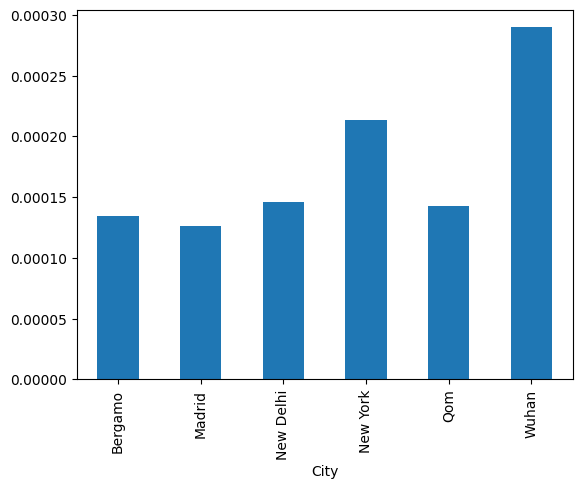

In [57]:
#print(df.groupby('City').mean())

print("\nMean of NO2 by City")
print(df.groupby('City')['NO2'].mean())

df.groupby('City')['NO2'].mean().plot.bar()

## 2. Median


Median of NO2 by City
City
Bergamo      0.000121
Madrid       0.000099
New Delhi    0.000131
New York     0.000166
Qom          0.000137
Wuhan        0.000242
Name: NO2, dtype: float64


<Axes: xlabel='City'>

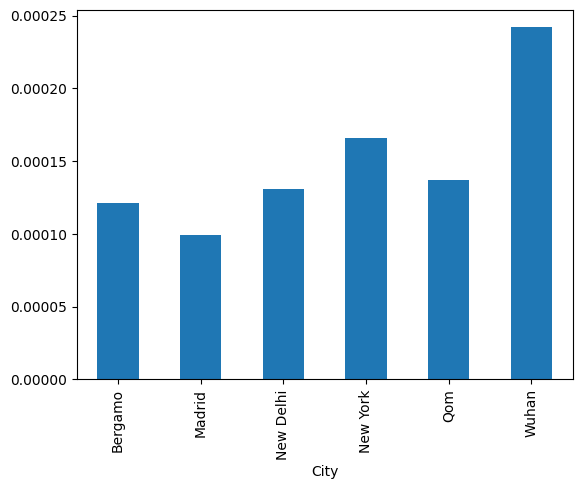

In [59]:
#print(df.groupby('City').median())

print("\nMedian of NO2 by City")
print(df.groupby('City')['NO2'].median())
df.groupby('City')['NO2'].median().plot.bar()

## 3. Mode

In [60]:
print("\nMode of NO2")
df["NO2"].mode()


Mode of NO2


,NO2
0,0.000105


# Measure of Variation

## 1. Standard deviation (SD)


Standard deviation (SD) of NO2 by City
City
Bergamo      0.000048
Madrid       0.000067
New Delhi    0.000053
New York     0.000146
Qom          0.000053
Wuhan        0.000193
Name: NO2, dtype: float64


<Axes: xlabel='City'>

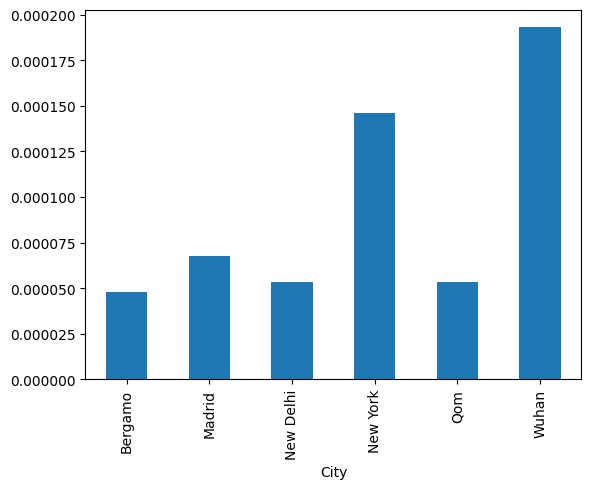

In [61]:
#print(df.groupby('City').std())

print("\nStandard deviation (SD) of NO2 by City")
print(df.groupby('City')['NO2'].std())
df.groupby('City')['NO2'].std().plot.bar()

## 2. Variance


Variance of NO2 by City
City
Bergamo      2.296208e-09
Madrid       4.539632e-09
New Delhi    2.820170e-09
New York     2.135659e-08
Qom          2.841500e-09
Wuhan        3.725134e-08
Name: NO2, dtype: float64


<Axes: xlabel='City'>

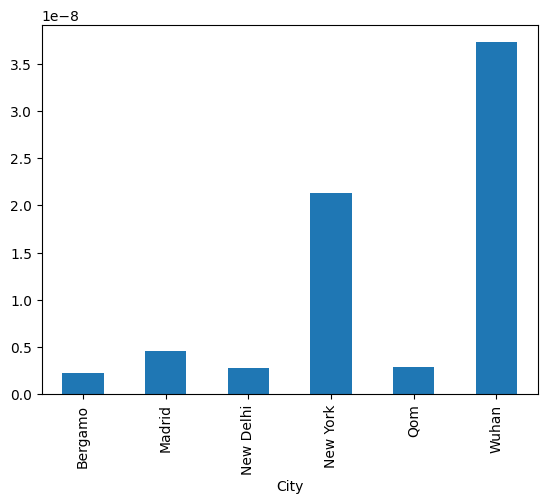

In [62]:
#print(df.groupby('City').var())

print("\nVariance of NO2 by City")
print(df.groupby('City')['NO2'].var())
df.groupby('City')['NO2'].var().plot.bar()

## Quantile

In [66]:
#print(df.quantile())   #default with 50%  (direct print)
#print()
# print(df.quantile([.5]))               #50%
# print()
print(df["NO2"].quantile([.1, .4, .9]))

0.1    0.000084
0.4    0.000117
0.9    0.000279
Name: NO2, dtype: float64
